In [2]:
import tensorflow as tf
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import numpy as np
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings("ignore")

In [4]:
X_train = np.loadtxt("Dataset\\input.csv",delimiter=",")
X_test = np.loadtxt("Dataset\\input_test.csv",delimiter=",")
y_train = np.loadtxt("Dataset\\labels.csv",delimiter=",")
y_test = np.loadtxt("Dataset\\labels_test.csv",delimiter=",")

FileNotFoundError: Dataset\input.csv not found.

In [ ]:
X_train = X_train.reshape(len(X_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

In [ ]:
X_train= X_train/255.0
X_test= X_test/255.0

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2000, 100, 100, 3), (400, 100, 100, 3), (2000, 1), (400, 1))

In [ ]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

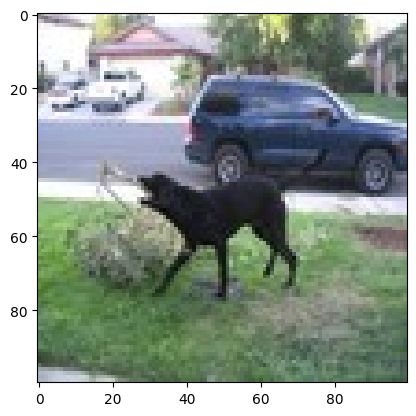

In [ ]:
n=random.randint(0,len(y_test))
plt.imshow(X_train[n,:])

# Model Building


In [ ]:
model = Sequential([
    
    Conv2D(32,(3,3),activation="relu",input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation="relu"),
    Dense(1,activation="sigmoid")
])

C:\Users\PAWAN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


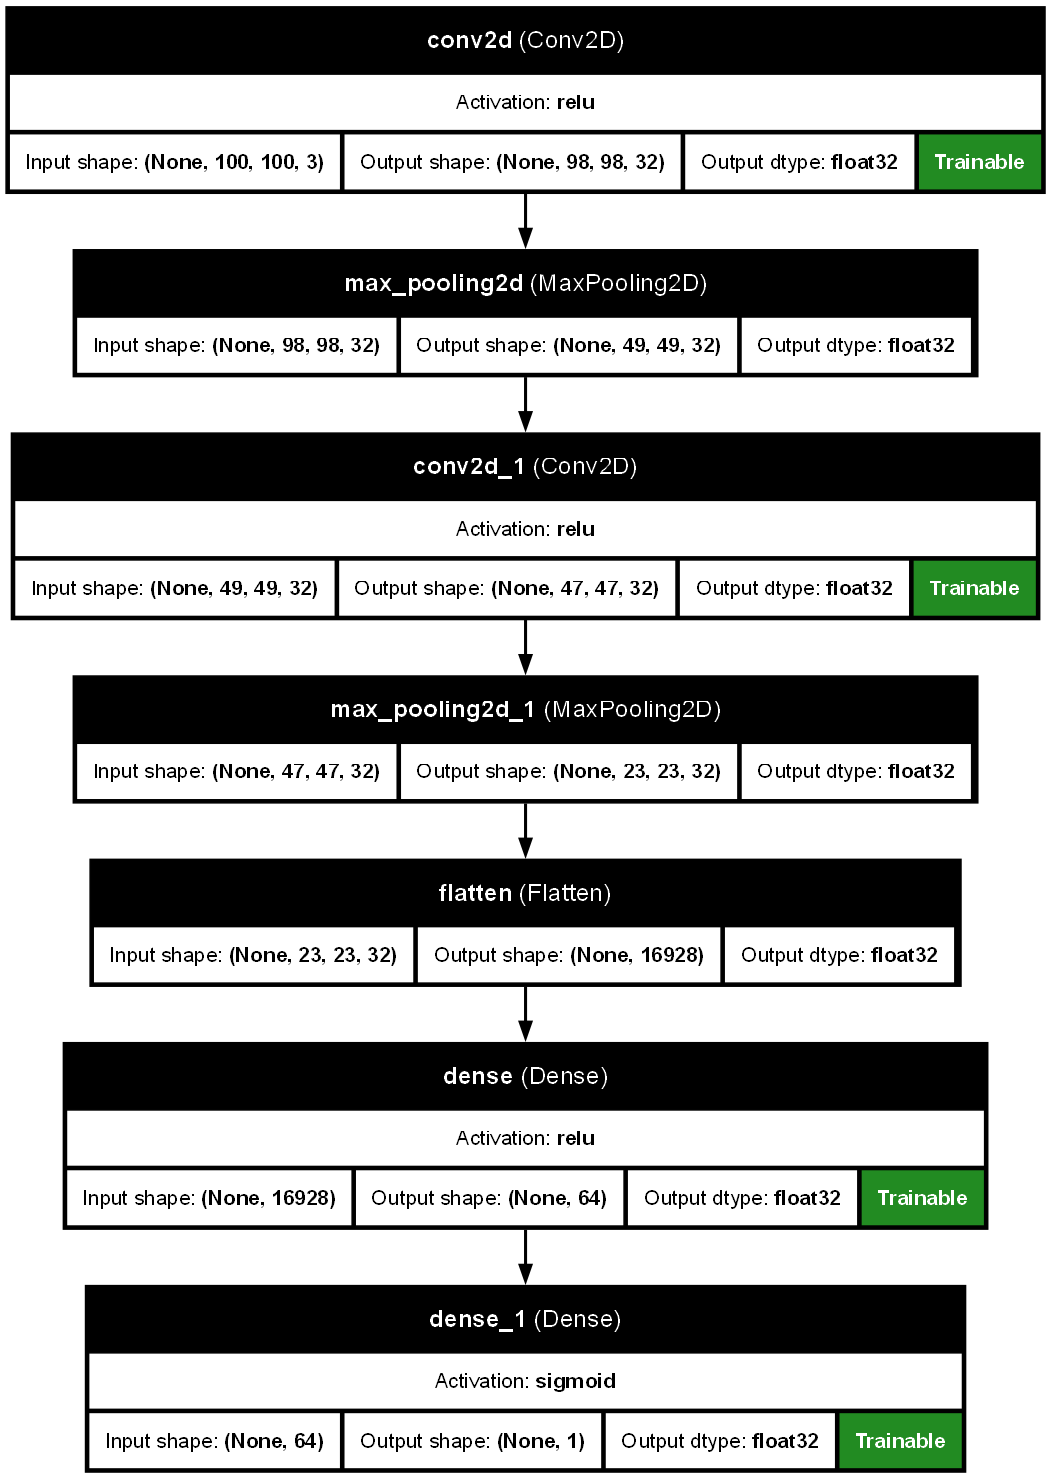

In [ ]:
keras.utils.plot_model(model,to_file='Model Architecture\\model.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=110,
    show_layer_activations=True,
    show_trainable=True)

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.7971 - loss: 0.4351
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.8521 - loss: 0.3623
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.8666 - loss: 0.3177
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.9114 - loss: 0.2399
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.9391 - loss: 0.1727
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.9605 - loss: 0.1273
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.9736 - loss: 0.0918
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.9827 - loss: 0.0683
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.9903 - loss: 0.0458
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.9989 - loss: 0.0232


In [ ]:
model.evaluate(X_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6861 - loss: 1.1834


[1.2319499254226685, 0.7024999856948853]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.1044953]]
Dog


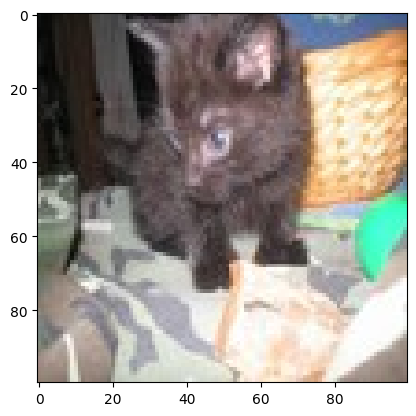

In [ ]:
n= random.randint(0,len(y_test))
plt.imshow(X_test[n,:])

prediction=model.predict(X_test[n,:].reshape(1,100,100,3))
print(prediction[0,0])

prediction = prediction >0.5

if prediction == 1:
    print("Prediction:Cat")
else:
    print("Prediction:Dog")